#1. ANN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 연습용 데이터
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[1]])
print(x)
print(y)

[[0 0]
 [1 0]
 [0 1]
 [1 1]]
[[0]
 [1]
 [1]
 [1]]


In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(3,1) )
model.fit( x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(3, 1))

###연습: creditset.csv에 DNN 적용, MLPClassifier와 비교

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

csv_data = pd.read_csv("creditset.csv")
X = csv_data.iloc[:, 1:4 ]
y  = csv_data.iloc[:, 5 ]

In [ ]:
#Partitioning
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform( X_train)
X_test  = scaler.fit_transform( X_test  )

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(6,3))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

np.mean( predictions == y_test )

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9366666666666666

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print( confusion_matrix(y_test,predictions) )
print('\n', classification_report(y_test,predictions) )

[[497  11]
 [ 27  65]]

               precision    recall  f1-score   support

           0       0.95      0.98      0.96       508
           1       0.86      0.71      0.77        92

    accuracy                           0.94       600
   macro avg       0.90      0.84      0.87       600
weighted avg       0.93      0.94      0.93       600



### 연습: 반도체 제조 data.csv에 DNN 적용, ML과 비교

- sklearn

In [ ]:
import pandas as pd
import numpy as np
csv_data = pd.read_csv("data.csv")
csv_data.shape

(1567, 49)

In [ ]:
csv_data['Pass.Fail'].value_counts()

0    1463
1     104
Name: Pass.Fail, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = csv_data.iloc[:, 0:48 ]   #모든행, 1열~48열까지
y = csv_data.iloc[:, 48 ]    #모든 행, 49열 인덱싱

#Partitioning
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform( X_train)
X_test  = scaler.fit_transform( X_test  )

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#DT
dt1 = DecisionTreeClassifier().fit(X_train, y_train)
pred = dt1.predict( X_test)
print('DT', np.mean( pred == y_test ))

#RF
rf = RandomForestClassifier(n_estimators=300, random_state=42).fit(X_train, y_train)
predicted = rf.predict(X_test)
print('RF', np.mean( predicted == y_test ))

#KNN
knn = KNeighborsClassifier().fit(X_train, y_train)  #k=5
predicted = knn.predict(X_test)
print('KNN', np.mean( predicted == y_test ))

#SVM
svm = SVC().fit(X_train, y_train)
predicted = svm.predict(X_test)
print('SVM', np.mean( predicted == y_test ))

#ANN
mlp = MLPClassifier(hidden_layer_sizes=(24,12,6)).fit(X_train,y_train)
predictions = mlp.predict(X_test)
print('ANN',np.mean( predictions == y_test ))

DT 0.5711252653927813
RF 0.9299363057324841
KNN 0.9320594479830149
SVM 0.9341825902335457
ANN 0.9341825902335457


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### mortdefault에 적용

In [ ]:
!unzip mortDefault.zip

Archive:  mortDefault.zip
replace mortDefault.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace mortDefault.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mortDefault.csv         


In [ ]:
import pandas as pd
data = pd.read_csv("mortDefault.csv")
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   creditScore  1000000 non-null  object 
 1   houseAge     999999 non-null   float64
 2   yearsEmploy  999999 non-null   float64
 3   ccDebt       1000000 non-null  int64  
 4   year         1000000 non-null  int64  
 5   default      1000000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 45.8+ MB


<ipython-input-2-12094d28177d>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("mortDefault.csv")


In [ ]:
import numpy as np
data = data.replace("@@@", "0", regex=True)
data = data.replace("qqq", "0", regex=True)
data.dropna(inplace=True)
data["creditScore"].astype('int')

In [ ]:
X = data[["creditScore","houseAge","yearsEmploy", "ccDebt"]]
y = data.default

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify = y )

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit( X_train)
X_train = scaler.transform( X_train )
X_test = scaler.transform( X_test )


In [ ]:
from sklearn.neural_network import MLPClassifier

model1 = MLPClassifier(hidden_layer_sizes = (3,2))
model1.fit(X_train, y_train)
model1.score(X_train, y_train)

0.9752586006896018

In [ ]:
from sklearn.metrics import classification_report
y_test = model1.predict( X_test )
print( classification_report( model1.predict(X_test), y_test) )


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"hidden_layer_sizes":[(3,3), (3,2)]}

model_search = GridSearchCV( estimator = MLPClassifier(),
                       param_grid=params,
                       scoring="accuracy",
                       verbose=10,
                       cv=2)
model_search.fit(X_train, y_train)


In [ ]:
model_search.best_score_
model_search.best_params_
model_search.best_estimator_

#2. K-means Clustering

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
from sklearn.cluster import KMeans
np.random.seed(5)
kmeans = KMeans(n_clusters=3)#n_clusters 클러스터의 개수, 기본은 8

#사용 함수
kmeans.fit(X)	#클러스터링
kmeans.get_params()	#파라미터 출력

#결과 활용
kmeans.labels_
kmeans.cluster_centers_
kmeans.inertia_		#각 클러스터내에서 센터와 각 자료 사이 거리 합의 제곱

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


78.851441426146

In [ ]:
#CSV를 읽은 후 k-means 클러스터링
csv_data = pd.read_csv("creditset.csv")
csv_data = csv_data.iloc[:, [1,2,3] ]	#2,3,4 열만 선택

kmeans = KMeans(n_clusters=3)
kmeans.fit(csv_data)	#클러스터링
kmeans.get_params()
kmeans.inertia_

#반복문으로 클러스터 개수별 K-means 비교하기
for numcl in [3,6,9]:
	kmeans2 = KMeans(n_clusters=numcl)
	kmeans2.fit(csv_data)
	print(kmeans2.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


59763353167.06793
26257678719.042725


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16914550023.145092


In [ ]:
#정규화:데이터 크기를 변환
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(csv_data)

for numcl in [3,6,9]:
	kmeans3 = KMeans(n_clusters=numcl)
	kmeans3.fit(scaled)
	print(kmeans3.inertia_)

209.1398773563638
117.38787299298357
87.32797895483114


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Agglomerative Clustering ( = Hierachical Clustering)

In [ ]:
from time import time
import numpy as np
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(linkage='ward', n_clusters=10)#n_clusters 클러스터 개수, 초기값 2
#linkage ward, complete, average, 기본값은 ward (ward는 거리가 euclidean에서 가능)

hclust.fit(X)
hclust.get_params()
hclust.labels_	#각 자료에 대한 클러스터 결과

array([9, 5, 5, 5, 9, 3, 5, 9, 5, 5, 3, 5, 5, 5, 3, 3, 3, 9, 3, 9, 3, 9,
       5, 9, 5, 5, 9, 9, 9, 5, 5, 3, 3, 3, 5, 5, 3, 9, 5, 9, 9, 5, 5, 9,
       9, 5, 9, 5, 3, 9, 8, 6, 8, 0, 8, 0, 6, 7, 8, 0, 7, 6, 0, 6, 0, 8,
       0, 0, 2, 0, 6, 6, 2, 6, 6, 8, 8, 4, 6, 0, 0, 0, 0, 2, 0, 6, 8, 2,
       0, 0, 0, 6, 0, 7, 0, 0, 0, 6, 7, 0, 4, 2, 1, 4, 4, 1, 0, 1, 4, 1,
       4, 4, 4, 2, 2, 4, 4, 1, 1, 2, 4, 2, 1, 2, 4, 1, 2, 6, 4, 1, 1, 1,
       4, 2, 2, 1, 4, 4, 6, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 6])

In [ ]:
#CSV를 읽은 후 Agglomerative 클러스터링
from pandas import read_csv
csv_data = read_csv("creditset.csv")	#또는 원하시는 경로를 지정해주세요. 예: c:/creditset.csv
csv_data = csv_data.iloc[:, [1,2,3]]	#2,3,4 열만 선택
print(csv_data.shape)

hclust = AgglomerativeClustering(linkage='ward', n_clusters=2)
hclust.fit(csv_data)
hclust.get_params()
hclust.labels_	#각 자료에 대한 클러스터 결과 출력

(2000, 3)


array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=10)
model2.fit(scaled)
model2.n_clusters
model2.labels_

array([0, 2, 0, ..., 6, 4, 0])

# 3. Associtaion Rule

- group by 연습

In [ ]:
import pandas as pd
df = pd.read_excel('OnlineRetail2.xlsx')#출처: UCI machine learning databases
df.head()

In [ ]:
df.Quantity.astype("float")
df.Quantity.astype("str").astype("int")

0        6
1        6
2        8
3        6
4        6
        ..
29994    3
29995    1
29996    2
29997    1
29998    1
Name: Quantity, Length: 29999, dtype: int64

In [ ]:
#자료 정리
df['Description'] = df['Description'].str.strip()	#Description 컬럼의 문자열 전후 공백 정리

In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')		#InvoiceNo을 문자열로 변경

In [ ]:
abc = df['InvoiceNo'].str.contains('C') #C: 취소건을 의미-> True면 취소된 주문
df[abc]
df[ ~abc ] #~ T->F, F->T

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
29994,538839,20780,BLACK EAR MUFF HEADPHONES,3,2010-12-14 13:10:00,5.49,14606.0,United Kingdom
29995,538839,21874,GIN AND TONIC MUG,1,2010-12-14 13:10:00,1.25,14606.0,United Kingdom
29996,538839,21934,SKULL SHOULDER BAG,2,2010-12-14 13:10:00,1.65,14606.0,United Kingdom
29997,538839,22299,PIG KEYRING WITH LIGHT & SOUND,1,2010-12-14 13:10:00,1.25,14606.0,United Kingdom


In [ ]:
df = df[~df['InvoiceNo'].str.contains('C')]		#InvoiceNo 중 정상적이지 않은 거래 건(C문자 포함 거래) 제외

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]) #skip

<ipython-input-17-599fae42c9ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]) #skip


In [ ]:
grouped = df.groupby(['InvoiceNo', 'Description'])['Quantity']

In [ ]:
#group by
#기준: country, description
#요약: unitprice의 최대값
df.groupby(['Country', 'Description'])['UnitPrice'].max().unstack().fillna(0)

In [ ]:
grouped.mean().unstack().fillna( 0 ) # grouped.sum()

Description,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,check,damages,faulty
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
grouped.mean().unstack().fillna(0).reset_index()
#set_index(): 컬럼을 이용해서 인덱스 설정, drop, inplace 등의 옵션
#reset_index(): 기존 인덱스를 컬럼으로, 인덱스는 일련번호로 설정

Description,InvoiceNo,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,check,damages,faulty
0,536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,538830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1080,538831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081,538832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1082,538836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#basket 형태로 변경
# 두 컬럼을 기준으로 Quantity값을 정리/ 합계구하고, 형태 변환 / index새로 생성/NaN값은0변환 / InvoiceNo으로 index 설정
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket

Description,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,check,damages,faulty
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#binarize
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

type(basket)

#전체 자료에 함수 적용
basket_sets = basket.applymap(encode_units)  #데이터프레임 전체 값에 함수적용
basket_sets.columns
basket_sets

Description,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,check,damages,faulty
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
#불필요한 컬럼 제거
basket_sets.drop('POSTAGE', inplace=True, axis=1) #열방향, 컬럼 제거거
basket_sets.drop('amazon', inplace=True, axis=1) #inplace=True, 원래 df에 적용시키기기
basket_sets.drop('check', inplace=True, axis=1)
basket_sets.drop('faulty', inplace=True, axis=1)
basket_sets.drop('damages', inplace=True, axis=1)


NameError: ignored

## Association Rule Mining

In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [ ]:
def func1( x ):
  if( x<=0.0):
    return False
  else:
    return True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#data_3.csv를 읽으셔서
# 1. artist 컬럼에 대해서 strip()
# 2. user_id의 dtype을 str
# 3.  userid, artist 를 기준, qty를 value group by, sum()

data = pd.read_csv("data_3.csv")
data["user"] = data["user"].astype("str")
data["artist"] = data["artist"].str.strip()
data1 = data.groupby([ "user",
                      "artist"])["qty"].sum().unstack().fillna(0).applymap(func1)
data1.head() #transaction encoding 적용한 결과

In [ ]:
tmp1  = apriori( data1, min_support=0.01, use_colnames=True )
tmp1  = fpgrowth( data1, min_support=0.01, use_colnames=True )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
patterns = association_rules( tmp1, metric='confidence', min_threshold=0.05 )
patterns.sort_values(by='lift', ascending=False).head(3)#lift 기준 내림차순

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4093,(the game),(snoop dogg),0.013848,0.024728,0.01088,0.785714,31.774286,0.010538,4.551269,0.982128
4092,(snoop dogg),(the game),0.024728,0.013848,0.01088,0.440000,31.774286,0.010538,1.760986,0.993085
3343,(cascada),(scooter),0.020772,0.020772,0.01088,0.523810,25.217687,0.010449,2.056380,0.980716


In [ ]:
#chipotle.tsv에 대해서 패턴을 발견해보세요. (delimiter="\t", header=0)
data = pd.read_csv("chipotle.tsv", delimiter="\t", header=0)
data["order_id"] = data["order_id"].astype("str")
data["item_name"] = data["item_name"].str.strip()
data1 = data.groupby([ "order_id",
                      "item_name"])["quantity"].sum().unstack().fillna(0).applymap(func1)

In [ ]:
#tmp1  = apriori( data1, min_support=0.01, use_colnames=True )
tmp1  = fpgrowth( data1, min_support=0.01, use_colnames=True )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
patterns = association_rules( tmp1, metric='confidence', min_threshold=0.05 )
patterns.sort_values(by='lift', ascending=False).head(2)#lift 기준 내림차순

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
82,(Chips),"(Bottled Water, Chicken Bowl)",0.113413,0.037623,0.015267,0.134615,3.578038,0.011,1.112080,0.812687
79,"(Bottled Water, Chicken Bowl)",(Chips),0.037623,0.113413,0.015267,0.405797,3.578038,0.011,1.492061,0.748685


### `mlxtend`에서 제공하는 [`TransactionEncoder`](http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/)을 사용하여 list 형식으로 구성된 거래 데이터를 2차원 numpy array로 변경  
- orders로 이루어진 DataFrame을 nested list (장바구니) 형태로 변경
   - order_id가 동일한 item_name을 하나의 리스트로 묶음
   - 이 때, apriori 알고리즘의 정의에 의해, 중복된 연관 규칙은 제거할 필요가 있음

In [ ]:
df_tmp = df.groupby('order_id')['item_name'].apply(set).apply(list).to_list()
print(df_tmp[:10])

[['Chips and Fresh Tomato Salsa', 'Nantucket Nectar', 'Izze', 'Chips and Tomatillo-Green Chili Salsa'], ['Chicken Bowl'], ['Side of Chips', 'Chicken Bowl'], ['Steak Soft Tacos', 'Steak Burrito'], ['Chips and Guacamole', 'Steak Burrito'], ['Chicken Crispy Tacos', 'Chicken Soft Tacos'], ['Chips and Guacamole', 'Chicken Bowl'], ['Chicken Burrito', 'Chips and Tomatillo-Green Chili Salsa'], ['Chicken Burrito', 'Canned Soda'], ['Chips and Guacamole', 'Chicken Bowl']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- nested list (장바구니)를 association rule을 찾기 위한 dataframe의 형태로 변경
  - Via the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method, it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array

In [ ]:
te = TransactionEncoder()
te_ary = te.fit_transform(df_tmp) # df_tmp를 장바구니 형태로 변경 (fit과 transform을 동시에 진행)
print(te_ary)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.DataFrame(te_ary, columns=te.columns_) # label 정보는 te.columns_에 저장되어 있으므로, 해당 값을 칼럼명으로 하는 데이터 프레임으로 변경.
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Association rule mining


In [ ]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True) # 여기서는 0.05를 기준으로 선정
frequent_itemsets.sort_values(by='support', ascending=False)

In [ ]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1).sort_values(by = ['confidence', 'lift', 'support'], ascending=False) # 최소 confidence를 0.1로 지정

# 4.Graph Mining

## 1) From Scratch (Edgelist)

In [ ]:
Fruits = ['apple', 'banana', 'kiwi', 'mango']
relations = [('apple', 'banana'), ('kiwi', 'apple'), ('mango', 'apple'), ('mango', 'banana')]

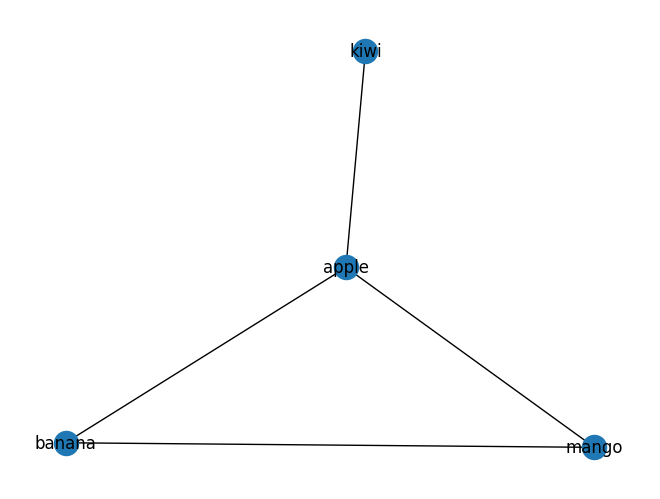

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Graph 생성
G = nx.Graph() #DiGraph, MultiGraph....

# Node (vertex) 생성
G.add_nodes_from(Fruits)

# Edge (link) 생성
G.add_edges_from(relations)  # graph에 속한 모든 node들이 edgelist에 포함된 경우 add_nodes_from() 과정을 생략할 수 있음

nx.draw(G, with_labels=True)
plt.show()

In [ ]:
G.edges

EdgeView([('apple', 'banana'), ('apple', 'kiwi'), ('apple', 'mango'), ('banana', 'mango')])

In [ ]:
print('Nodes:', G.nodes)
print('Number of nodes:', nx.number_of_nodes(G))
print('Edges:', G.edges)
print('Number of nodes:', nx.number_of_edges(G))

Nodes: ['apple', 'banana', 'kiwi', 'mango']
Number of nodes: 4
Edges: [('apple', 'banana'), ('apple', 'kiwi'), ('apple', 'mango'), ('banana', 'mango')]
Number of nodes: 4


In [ ]:
print(G)

Graph with 4 nodes and 4 edges


- degree: node와 연결된 모든 edge의 수

In [ ]:
degree = nx.degree(G)
print(degree)

[('apple', 3), ('banana', 2), ('kiwi', 1), ('mango', 2)]


In [ ]:
print(list(G.neighbors('banana')))

['apple', 'mango']


- Directed graph의 경우 다음과 같이 생성 가능

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 방향이 있는 네트워크 생성
G_directed = nx.DiGraph()

G_directed.add_nodes_from(Fruits)
G_directed.add_edges_from(relations)

In [ ]:
in_degree = G_directed.in_degree()
out_degree = G_directed.out_degree()
print('in-degree:', in_degree)
print('out-degree:', out_degree)

in-degree: [('apple', 2), ('banana', 2), ('kiwi', 0), ('mango', 0)]
out-degree: [('apple', 1), ('banana', 0), ('kiwi', 1), ('mango', 2)]


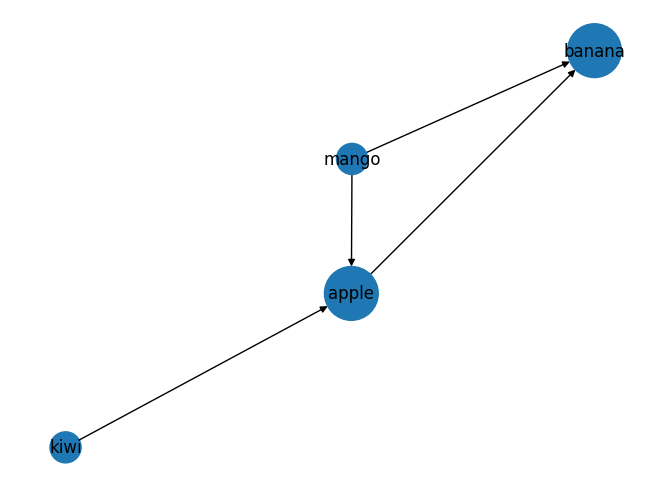

In [ ]:
# 시각화 (degree가 클수록 원의 크기도 크도록)
nx.draw(G_directed, node_size=[500 + v[1]*500 for v in in_degree], with_labels=True)

## 2) From Scratch (Adjacency matrix)

In [ ]:
# Adjacency matrix
A = nx.to_numpy_array(G)
print(A)

[[0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]]


In [ ]:
G_Adjacency=nx.from_numpy_array(A) # node label이 지정되지 않은 상태 (0, 1, 2, ...)
nx.draw(G_Adjacency, with_labels=True)
plt.show()

mapping = {i: f for i, f in enumerate(Fruits)}
print(mapping) # 변경할 label 형태

H = nx.relabel_nodes(G_Adjacency, mapping)
nx.draw(H, with_labels=True)
plt.show()

## 3) From Dataset

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
G_data = nx.read_edgelist('facebook_combined.txt', delimiter=" ")
print(G_data)

Graph with 4039 nodes and 88234 edges


In [ ]:
G_data.edges

## Graph Metric

## 1) Structure

In [ ]:
print('diamter:', nx.diameter(G_data))
print('density:', nx.density(G_data))
print('transitivity:', nx.transitivity(G_data))
print('reciprocity:', nx.reciprocity(G_data))

diamter: 8
density: 0.010819963503439287
transitivity: 0.5191742775433075
reciprocity: 0.0


## 2) Centrality

In [ ]:
G2 = nx.read_edgelist( "cora.cites", create_using=nx.DiGraph(), nodetype=int)

In [ ]:
print('degree centrality:\n', nx.degree_centrality(G2))
print('betweenness centrality:\n', nx.betweenness_centrality(G2))
print('closeness centrality:\n', nx.closeness_centrality(G2))

degree centrality:
 {35: 0.06243073513114149, 1033: 0.001847063169560399, 103482: 0.0022164758034724785, 103515: 0.004063538973032878, 1050679: 0.0014776505356483192, 1103960: 0.001847063169560399, 1103985: 0.0007388252678241596, 1109199: 0.0011082379017362393, 1112911: 0.0014776505356483192, 1113438: 0.001847063169560399, 1113831: 0.0011082379017362393, 1114331: 0.001847063169560399, 1117476: 0.0011082379017362393, 1119505: 0.0007388252678241596, 1119708: 0.001847063169560399, 1120431: 0.0014776505356483192, 1123756: 0.0014776505356483192, 1125386: 0.0014776505356483192, 1127430: 0.0007388252678241596, 1127913: 0.0014776505356483192, 1128204: 0.0007388252678241596, 1128227: 0.0014776505356483192, 1128314: 0.0011082379017362393, 1128453: 0.0014776505356483192, 1128945: 0.0003694126339120798, 1128959: 0.0007388252678241596, 1128985: 0.0014776505356483192, 1129018: 0.0007388252678241596, 1129027: 0.0007388252678241596, 1129573: 0.0011082379017362393, 1129683: 0.001847063169560399, 112977

# 5. Collaborative Filtering (협업 필터링)

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163484 sha256=5d5d56e7c17e7cc8172636ef5676a513f38a2f27ee0d9faa70561eca1cb427ea
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
df = pd.read_csv('movies.csv')
df

,userId,title,rating,timestamp
0,1,American Pie,4.0,1260759139
1,4,American Pie,4.0,949896114
2,15,American Pie,4.0,1052896867
3,30,American Pie,2.0,994439964
4,34,American Pie,4.0,973747765
...,...,...,...,...
18566,652,Lion of the Desert,5.0,1440269953
18567,652,Mud,5.0,1439586954
18568,659,K-PAX,4.0,836137550
18569,659,Starship Troopers,3.0,834694187


In [ ]:
from surprise import Reader, Dataset, KNNBasic, SVD
from surprise.model_selection import train_test_split, cross_validate
import pandas as pd

# Prepare the data to be used in Surprise
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(df[['userId', 'title', 'rating']], reader=reader)


In [ ]:
data

In [ ]:
sim_options = {
    'name': 'cosine',
    'user_based': True
}
algo = KNNBasic(sim_options=sim_options)

# Retrieve the trainset.
trainset, testset = train_test_split(data)
algo.fit(trainset)

# Predict
print(algo.predict(1, 5, r_ui=None, verbose=True))

Computing the cosine similarity matrix...
Done computing similarity matrix.
user: 1          item: 5          r_ui = None   est = 3.54   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: 1          item: 5          r_ui = None   est = 3.54   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [ ]:
prediction = algo.test(testset)
prediction[:5]

[Prediction(uid=472, iid='Boogie Nights', r_ui=4.0, est=4.201173462840423, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=517, iid='Metropolis', r_ui=3.0, est=2.6268575319505496, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=23, iid='Being John Malkovich', r_ui=4.5, est=3.5271392246906523, details={'actual_k': 17, 'was_impossible': False}),
 Prediction(uid=523, iid='A Nightmare on Elm Street', r_ui=4.0, est=3.4626506634583705, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=105, iid='20,000 Leagues Under the Sea', r_ui=2.0, est=2.887541215716813, details={'actual_k': 40, 'was_impossible': False})]

In [ ]:
from surprise import BaselineOnly
from surprise import KNNWithMeans, KNNBasic, KNNBaseline
from surprise import SVD
from surprise import SVDpp

from surprise import accuracy
from surprise import Dataset
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
trainset, testset = train_test_split(data, test_size = 0.25)

In [ ]:
recom = KNNBasic()  #CF
recom.fit(trainset)
predictions = recom.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9505


0.9505290217572812

In [ ]:
recom = SVD()  #matrix 분해 (SVD) 이용
recom.fit(trainset)
predictions = recom.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9034


0.9034162368979297